In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Importing Data

In [2]:
salary_df = pd.read_csv('./../data/salary.csv')

In [3]:
salary_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [4]:
salary_df.describe(include='all')

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


# Cleaning the data

In [5]:
salary_df = salary_df.dropna()
salary_df.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [6]:
salary_df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


# Data Analysis

In [20]:
q1 = salary_df.salary.quantile(q=0.25)
q3 = salary_df.salary.quantile(q=0.75)
IQR = q3 - q1
IQR

20345.0

The minimum salary is `R29000.00` and the maximum salary is `R96156.00`. The mean of the salary is `R50863.22`. The standard deviation of years worked is `9.444695`. The median of the salary is `R50096.00`. The interquantile range of the salary is `R20345`.

In [21]:
males = salary_df[salary_df.male == 1]
females = salary_df[salary_df.male == 0]

In [22]:
sex_table = {
    'sex':['male', 'female'],
    'Number of Executives': [len(males[males.position == 3]), len(females[females.position == 3])],
    'Number of Managers':[len(males[males.position == 2]), len(females[females.position == 2])],
    'Number of Junior employees':[len(males[males.position == 1]), len(females[females.position == 1])],
    'Total': [len(males), len(females)]
}

sex_df = pd.DataFrame(sex_table)
sex_df.set_index('sex')

,Number of Executives,Number of Managers,Number of Junior employees,Total
sex,,,,
male,191,111,83,385
female,19,49,60,128


# Visualisation

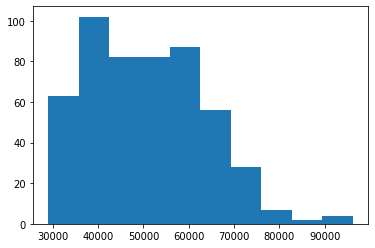

In [10]:
plt.hist(x=salary_df.salary, bins=10);

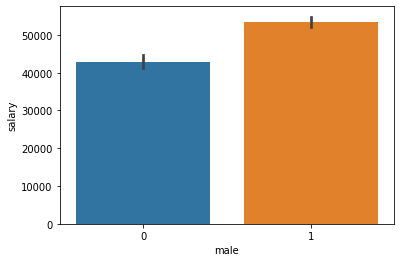

In [11]:
sns.barplot(x='male', y='salary', data=salary_df);

The above graph shows males, on average, earn more than females.

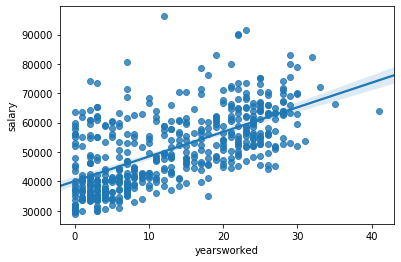

In [12]:
sns.regplot(x='yearsworked', y='salary', data=salary_df);

In [13]:
salary_df[salary_df.salary > 90000]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
280,91405.0,0,23,14,1.18,1,0,3,1,1,0
371,90082.0,10,22,22,1.00,1,0,3,1,2,2
377,96156.0,20,12,12,1.19,1,0,3,1,1,2


The above graph indicates how the number of years worked and the salary are highly correlated. This means, the longer years you work (on average) the more money you will earn. There is an outlier of someone who worked for 12 years but is one of the highest earning individual.

# Pearson Correlation

In [14]:
help(stats.pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets.  The calculation of the p-value relies on the
    assumption that each dataset is normally distributed.  (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)  Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these da

In [15]:
stats.pearsonr(salary_df.yearsworked, salary_df.salary)

(0.6235888657598052, 1.2873351342912745e-56)

The above p-value shows that the relationship between the years worked and the amount of the salary are strongly correlated.